# ConnecTTel Project Overview 

#### 
ConnectTel is a leading telecommunications company at the forefront of innovation and connectivity solutions. With a strong presence in the global market, ConnectTel has established itself as a trusted provider of reliable voice, data, and Internet services.

Offering a comprehensive range of telecommunications solutions, including mobile networks, broadband connections, and enterprise solutions, ConnectTel caters to both individual and corporate customers, they are committed to providing exceptional customer service and cutting-edge technology.ConnectTel ensures seamless communication experiences for millions of users worldwide.

Through strategic partnerships and a customer-centric approach, ConnectTel continues to revolutionize the telecom industry, empowering individuals and businesses to stay connected and thrive in the digital age.

### Business Challenges

ConnectTel Telecom Company faces the pressing need to address customer churn, which poses a significant threat to its business sustainability and growth.

The company's current customer retention strategies lack precision and effectiveness, resulting in the loss of valuable customers to competitors. To overcome this challenge, ConnectTel aims to develop a robust customer churn prediction system for which you have been contacted to handle as a Data Scientist. By leveraging advanced analytics and machine learning techniques on available customer data, the company seeks to accurately forecast customer churn and implement targeted retention initiatives.

This proactive approach will enable ConnectTel to reduce customer attrition, enhance customer loyalty, and maintain a competitive edge in the highly dynamic and competitive telecommunications industry.

### Data Dictionary

1. CustomerID: A unique identifier assigned to each telecom customer, enabling

tracking and identification of individual customers.

2. Gender: The gender of the customer, which can be categorized as male, or
female. This information helps in analyzing gender-based trends in
customer churn.

3. SeniorCitizen: A binary indicator that identifies whether the customer is a senior citizen
or not. This attribute helps in understanding if there are any specific
churn patterns among senior customers.

4. Partner: Indicates whether the customer has a partner or not. This attribute helps

in evaluating the impact of having a partner on churn behavior.
5. Dependents: Indicates whether the customer has dependents or not. This attribute
helps in assessing the influence of having dependents on customer
churn.

6. Tenure: The duration for which the customer has been subscribed to the telecom

service. It represents the loyalty or longevity of the customer’s
relationship with the company and is a significant predictor of churn.
7. PhoneService: Indicates whether the customer has a phone service or not. This attribute

helps in understanding the impact of phone service on churn.

8. MultipleLines: Indicates whether the customer has multiple lines or not. This attribute helps in analyzing

the effect of having multiple lines on customer churn.

9. InternetService: Indicates the type of internet service subscribed by the customer, such as DSL, fiber optic,
or no internet service. It helps in evaluating the relationship between internet service and
churn.

10. OnlineSecurity: Indicates whether the customer has online security services or not. This attribute helps in

analyzing the impact of online security on customer churn.

11. OnlineBackup: Indicates whether the customer has online backup services or not. This attribute helps in

evaluating the impact of online backup on churn behavior.

12. DeviceProtection: Indicates whether the customer has device protection services or not. This attribute helps

in understanding the influence of device protection on churn.

13. TechSupport: Indicates whether the customer has technical support services or not. This attribute helps

in assessing the impact of tech support on churn behavior.

14. StreamingTV: Indicates whether the customer has streaming TV services or not. This attribute helps in

evaluating the impact of streaming TV on customer churn.

15. StreamingMovies: Indicates whether the customer has streaming movie services or not. This attribute helps in understanding the influence

of streaming movies on churn behavior.

16. Contract: Indicates the type of contract the customer has, such as a month-to-month, one-year, or two-year contract. It is a crucial

factor in predicting churn as different contract lengths may have varying impacts on customer loyalty.

17. PaperlessBilling: Indicates whether the customer has opted for paperless billing or not. This attribute helps in analyzing the effect of

paperless billing on customer churn.

18. PaymentMethod: Indicates the method of payment used by the customer, such as electronic checks, mailed checks, bank transfers, or credit

cards. This attribute helps in evaluating the impact of payment methods on churn.

19. MonthlyCharges: The amount charged to the customer on a monthly basis. It helps in understanding the relationship between monthly

charges and churn behavior.

20. TotalCharges: The total amount charged to the customer over the entire tenure. It represents the cumulative revenue generated from the

customer and may have an impact on churn.

21. Churn: The target variable indicates whether the customer has churned (canceled the service) or not. It is the main variable to

predict in telecom customer churn analysis.

### Problem Definition

Connectell is currently facing a challenge with customer churn, as preliminary analysis indicates that a quarter of their customers have already churned. 
This undoubtedly has had a significant impact on Connectell's revenue. The primary objective of this analysis is to leverage business data and other publicly available information to assess Connectell's services and products. 
The goal is to understand the reasons behind customer attrition and utilize machine learning algorithms to predict potential churn based on existing data trends. 
This analysis will enable the company to identify key predictor variables and take proactive measures to strategize and implement effective actions to minimize customer churn to the greatest extent possible.

### Import necessary libraries

In [1]:
# Import necessary libraries

# For Data Analysis
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

### Load the Dataset

In [2]:
customer_churn = pd.read_csv(r"C:\Users\amosu\OneDrive\Desktop\Amosun\Data Cleaning\Clean Dataset\Customer-Churn - Customer-Churn.csv")

In [3]:
customer_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Let us check data heads

In [4]:
customer_churn.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Statistical Analysis

In [5]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


 Noticeably all columns except "Senior Citizen", "Tenure", "Monthly Charges", "Total Charges" are object data
 Although "senior citizen" column is categorical based on the info provided in data dictionary,.

In [6]:
customer_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


The mean and median values show slight variations across all three numerical columns, 
with the most notable difference observed in the 'Total Charges' column. 
This discrepancy suggests the presence of potential outliers in the dataset

In [7]:
customer_churn.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [8]:
customer_churn.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [9]:
customer_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [10]:
# Check for missing values
customer_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
print(customer_churn['TotalCharges'].isnull().sum())

11


Only 11 values are missing in the the Total charges column which is very less.
It can be removed or be filled in with the median value.
I will opt to fill in with the median value

In [12]:
# Calculate the median of 'TotalCharges'
median_total_charges = customer_churn['TotalCharges'].median()

In [13]:

# Fill missing values with the median
customer_churn['TotalCharges'].fillna(median_total_charges, inplace=True)

In [14]:
customer_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
# Data Verification - Data type, number of features and rows, missing data etc..
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Exploratory Data Analysis

In [16]:
customer_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: >

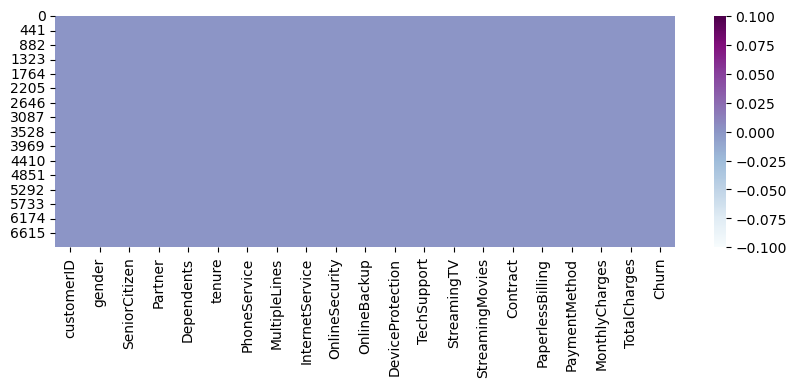

In [17]:
# visualising the missing data # note: no missing value
plt.figure(figsize = (10,3))
sns.heatmap(customer_churn.isnull(), cbar = True, cmap = 'BuPu')

Now missing values has been corrected, no more missing values

In [18]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
num_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_columns = ['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [20]:
num_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

In [21]:
cat_columns

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

## EDA Analysis

In [22]:
def plot_stacked_bars(dataframe, title_, colors=None, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_,
        color=colors 
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    
    # Labels
    plt.ylabel("Customer base (%)")
    
    plt.show()
    
    
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=8):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectangles/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(), 1))
        
        # If value is 0 do not annotate
        if value == '0.0':
            continue
            
        ax.annotate(
            value,
            ((p.get_x() + p.get_width() / 2) * pad - 0.05, (p.get_y() + p.get_height() / 2) * pad),
            color=colour,
            size=textsize
        )

In [23]:
churn = customer_churn[['customerID','Churn']]
churn.columns=['Customer','churn']
churn_total=churn.groupby(churn['churn']).count()
churn_percentage=round(churn_total/churn_total.sum()*100, 0)

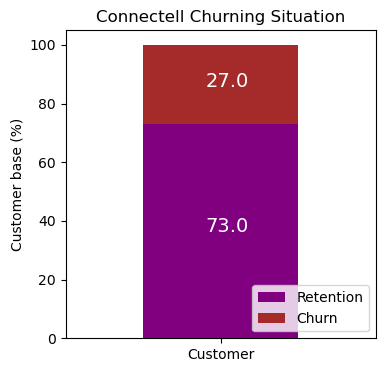

In [24]:
custom_colors = ["purple", "brown"]
plot_stacked_bars(churn_percentage.transpose(), "Connectell Churning Situation", 
                  size_=(4, 4), rot_=0, legend_="lower right", colors = custom_colors)

The above revealed that 27% churning of Connecttel Limited at the moment

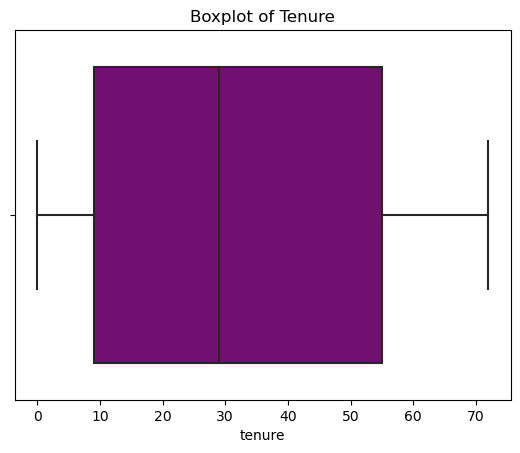

In [25]:
# check for outliers
sns.boxplot(x = customer_churn['tenure'], palette=['purple', 'lightpurple', 'orange'])
plt.title('Boxplot of Tenure')
plt.show()

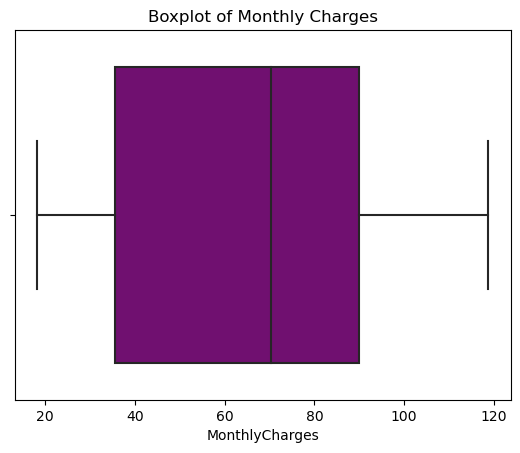

In [26]:
# check for outliers
sns.boxplot(x = customer_churn['MonthlyCharges'], palette=['purple', 'lightpurple', 'orange'])
plt.title('Boxplot of Monthly Charges')
plt.show()

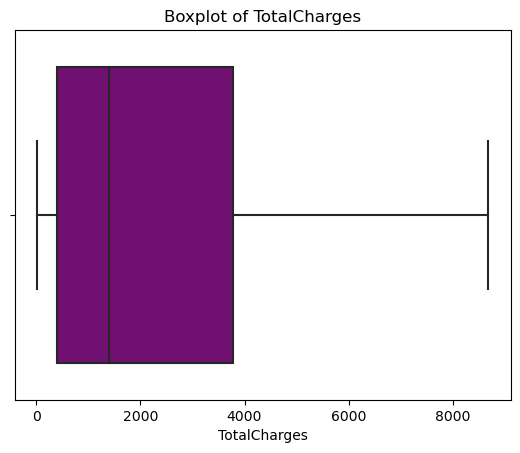

In [27]:
# check for outliers with boxplot
sns.boxplot(x=customer_churn['TotalCharges'], palette=['purple', 'lightpurple', 'orange'])
plt.title('Boxplot of TotalCharges')
plt.show()


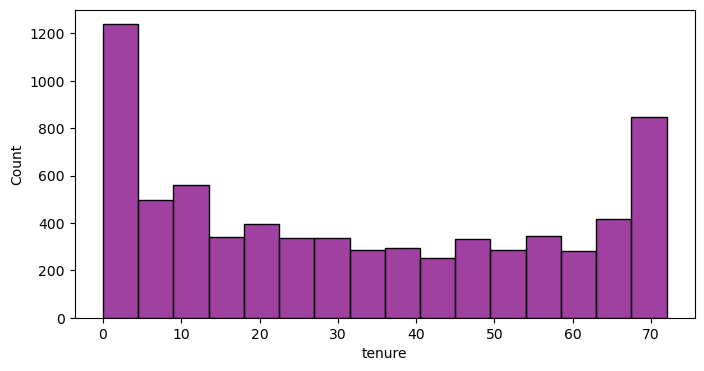

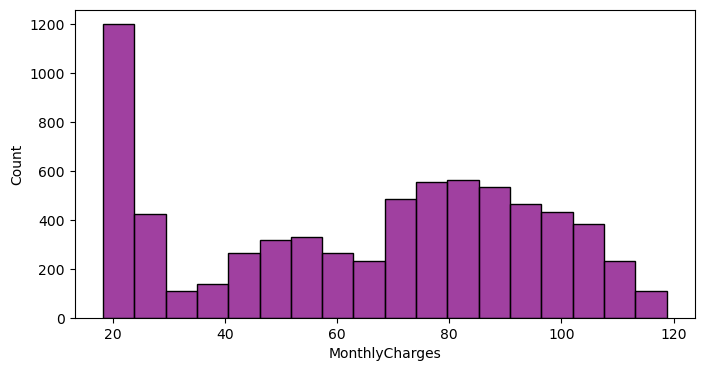

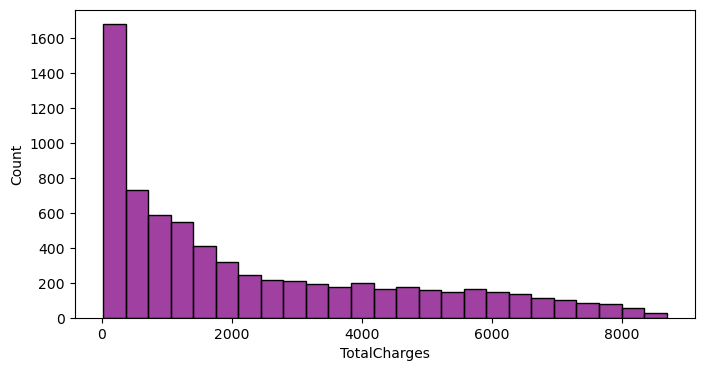

In [28]:
for numerical in num_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(data=customer_churn, x=numerical, color='purple')
    plt.savefig(numerical + '.png')

### Bivariate Analysis

Text(0.5, 1.0, 'Customers Churning Rate by Gender')

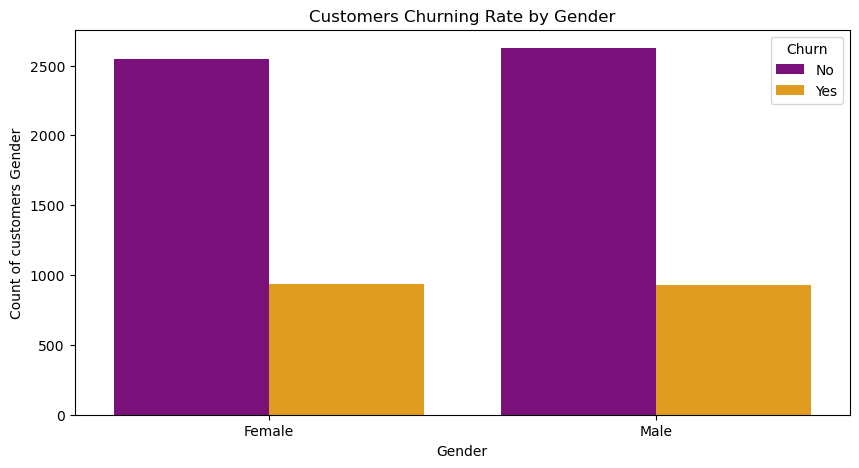

In [29]:
# Inestigating gender of customers by churning rate 

# Create a custom palette with purple and orange
custom_palette = ['#8b008b', '#ffA500']  # Hex codes for purple and orange

plt.figure(figsize = (10,5))
sns.countplot(x = 'gender', data = customer_churn, hue = 'Churn' , palette=custom_palette)
plt.xlabel('Gender')
plt.ylabel('Count of customers Gender')
plt.title('Customers Churning Rate by Gender')

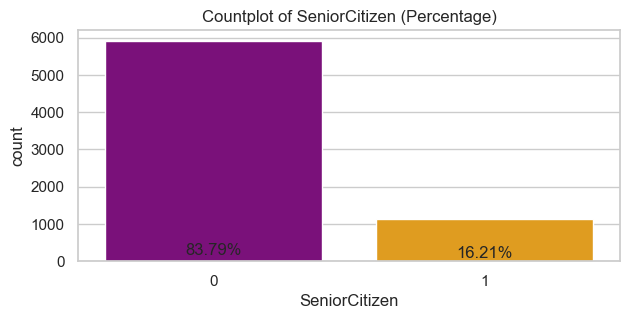

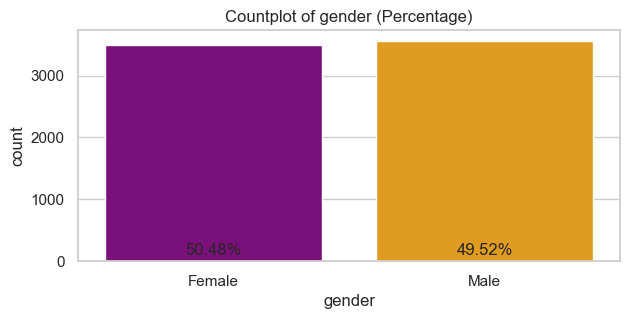

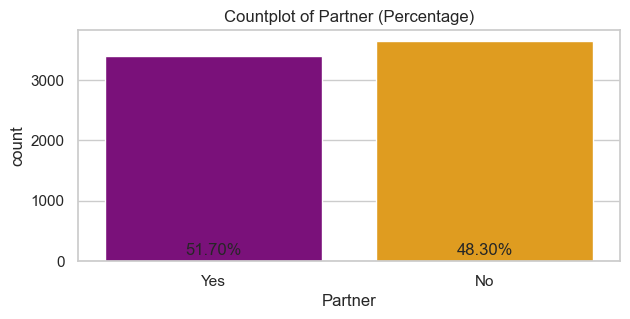

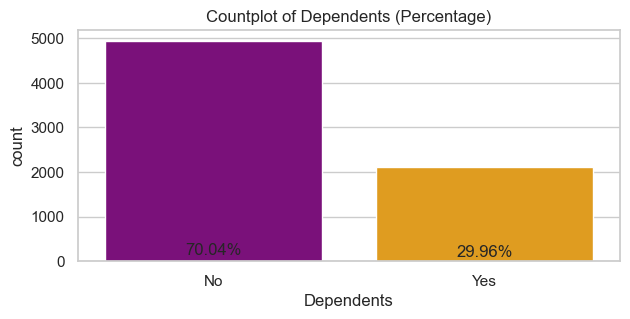

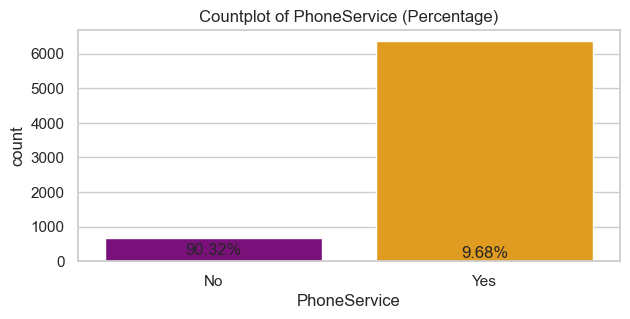

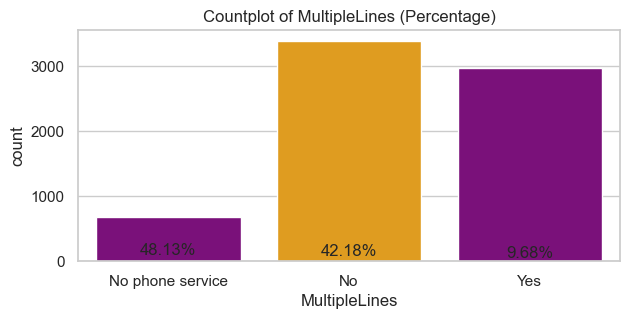

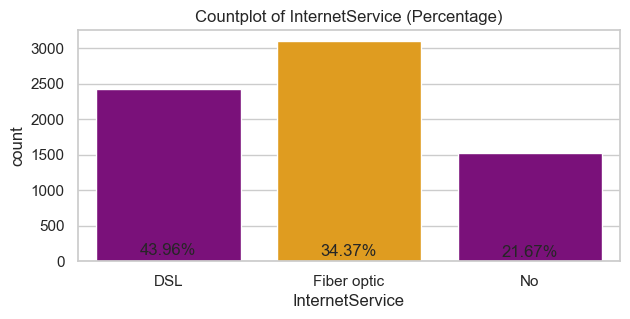

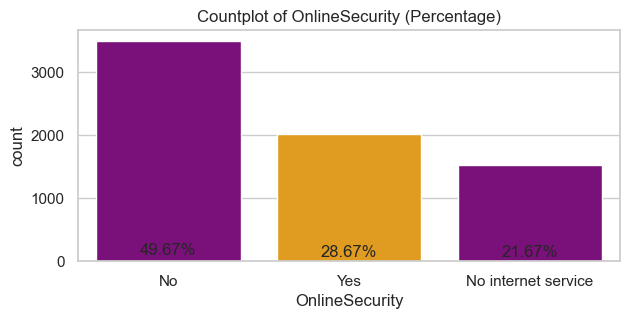

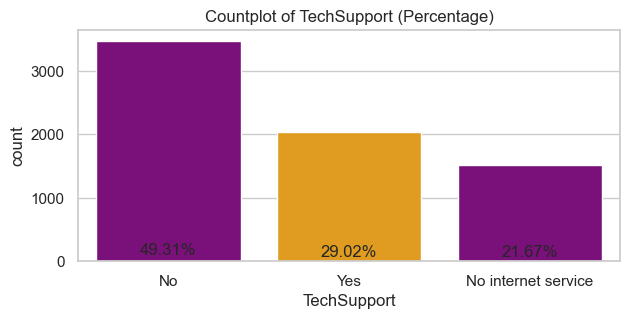

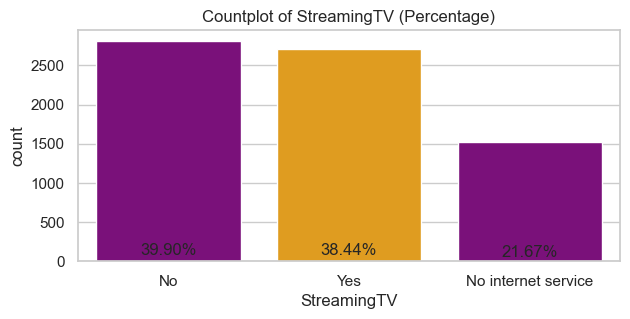

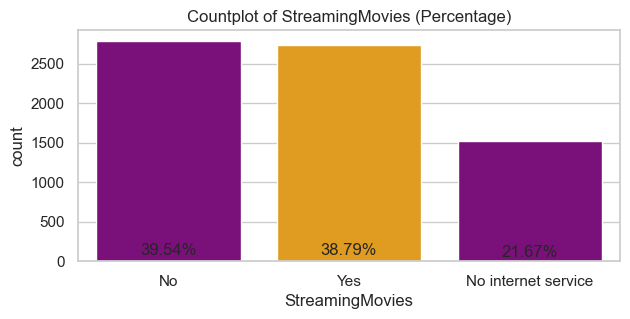

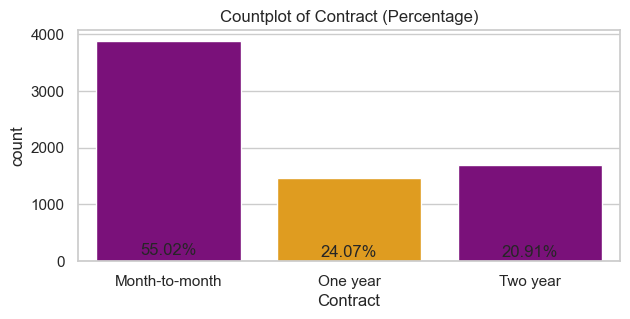

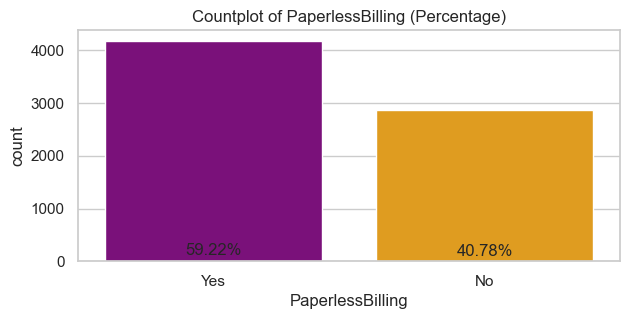

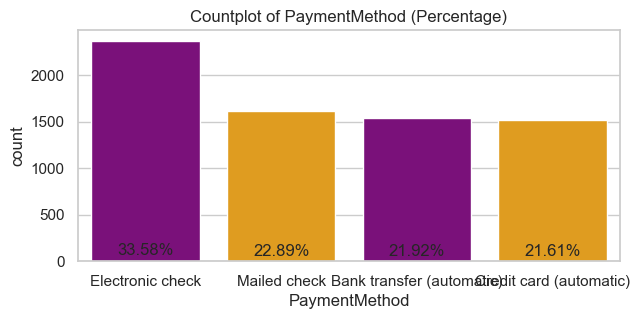

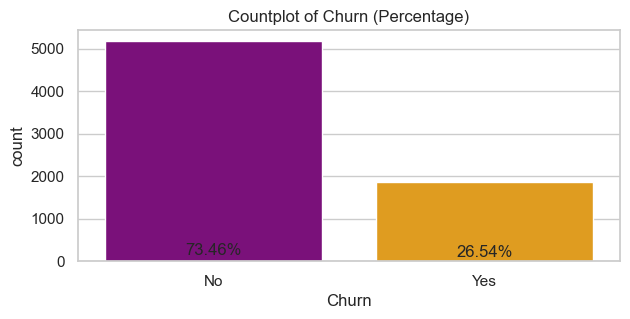

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Define purple and orange colors
purple_color = '#8b008b'
orange_color = '#ffA500'

cat_columns = ['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for category in cat_columns:
    plt.figure(figsize=(7, 3))
    
    # Calculate percentage values
    total_count = len(customer_churn[category])
    percentage_values = (customer_churn[category].value_counts() / total_count) * 100
    
    # Plot the countplot with purple and orange palette
    sns.countplot(data=customer_churn, x=category, palette=[purple_color, orange_color])
    
    # Annotate bars with percentage values
    for index, value in enumerate(percentage_values):
        plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')
    
    plt.title(f'Countplot of {category} (Percentage)')
    plt.show()


## Observation



#### Gender Distribution and Churn Analysis:

* The existing customer base revealed a relative balanced distribution between both genders, with a slight higher numbers of male customers. 
* Despite this nearly equal distribution, the percentage of churn is slightly high among female customers compared to their male counterparts.
* To gain deeper insights, a more thorough investigation is required to uncover the significance of gender in customer churn.
* It is essential to explore the underlying factors contributing to the higher churn rate among female customers. 
* Implementing targeted strategies to address this observed difference would be beneficial in mitigating churn and enhancing overall customer retention efforts.

#### Senior Citizen Status:

* Fewer customers with senior citizen status churn compared to those without senior citizen status. Churn seems to be more common among senior citizens than younger customers. 
* Additional analysis is needed to identify the factors behind the higher churn rates among senior citizens and to consider strategies for retaining this customer segment.

#### Partner Status:

* The customer base is almost evenly distributed between both genders, with a slight majority of male customers.
* Despite nearly balanced gender distribution, the churn percentage is slightly higher among female customers compared to males.
* Further investigation is needed to understand if gender plays a significant role in customer churn and to explore potential strategies to addressing any observed disparities.

#### Dependants:

* Customers without partners experience nearly twice the churn rate as those with partners.
* Further analysis is essential to understand the factors influencing churn, especially in specific customer segments such as those without partners.

#### Phone Service:

* Customers with phone service have a slightly higher churn rate compared to those without it. 
* Further investigation is needed to understand the factors influencing churn in the context of phone service subscription.

#### Multiple Line Service:

* Customers with no multiple line service churn more than those with a multiple lines or no phone service. 
* Further exploration is necessary to identify the specific reasons behind the higher churn rates associated with multiple line subscriptions.

#### Internet Services:

* It is evident that no fewer than 43.96% churned in being DSL subscriber , 34.37% Fibre Optic, and only 21.67% churned among those are not internet subscribers

#### Online Security:

* 49.67% of customers without online security experienced churn, and 28.67% with online security service also churned, while only 21.67% of customers without internet service churned.

#### Tech Support:

* The churning rate for customers without Tech Support is comparatively higher than those with Tech Support and those without internet service, i.e., 49.31%, 29.02%, and 21.67%, respectively.

#### Streaming TV:

* Those without Streaming TV are churning almost equally to the number of those with the streaming service, while only 21.67% represent those churning among those with no internet service.

#### Streaming Movies:

* Similarly, those without Streaming movies are churning almost equally to the number of those with the streaming service, while only 21.67% represent those churning among those with no internet service.

#### Paperless Billing:

* Customers who subscribe to paperless billing have a higher percentage of churning (59.22%) than those who do not subscribe to this billing method.

#### Contract Type:

* The highest rate of churning is observed among customers with month-to-month contracts, representing slightly more than half of the churning in this customer subcategory.
* Whereas, no less than 24.07% churning is observed among customers with 1-year contracts. The least, 20.91% churning is observed among two-year contract customers.

#### Payment Method:

* Observably, 33.58% of customers using electronic checks for payment experienced churn. 
* Also, 22.89% of customers using mailed checks for payment experienced churn.
* While, 21.92% of customers using automatic bank transfer for payment experienced churn. 
* 21.61% churning was observed among customers using automatic credit cards for payment.






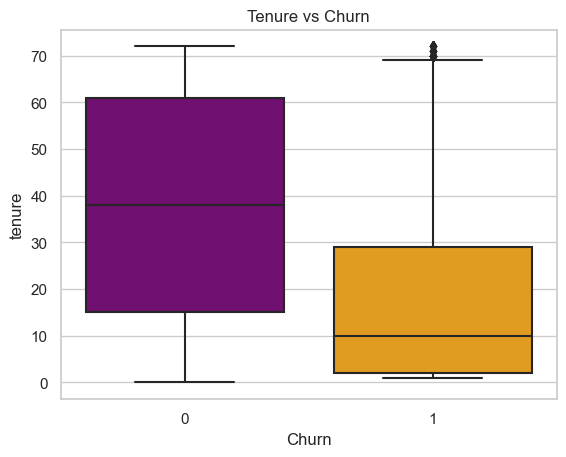

In [58]:
# Visualizing the relationship between 'tenure' and 'churn' with boxplot
sns.boxplot(x='Churn', y='tenure', data=customer_churn, palette=['purple', 'orange'])
plt.title('Tenure vs Churn')
plt.show()

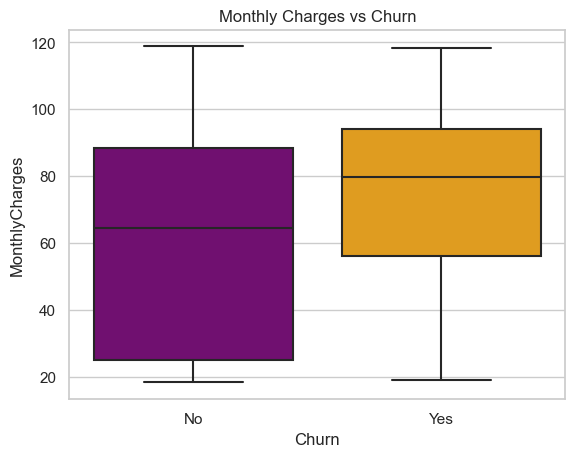

In [31]:
# Visualizing the relationship between 'monthlycharges' and 'churn'
sns.boxplot(x='Churn', y='MonthlyCharges', data=customer_churn, palette=['purple', 'orange'])
plt.title('Monthly Charges vs Churn')
plt.show()

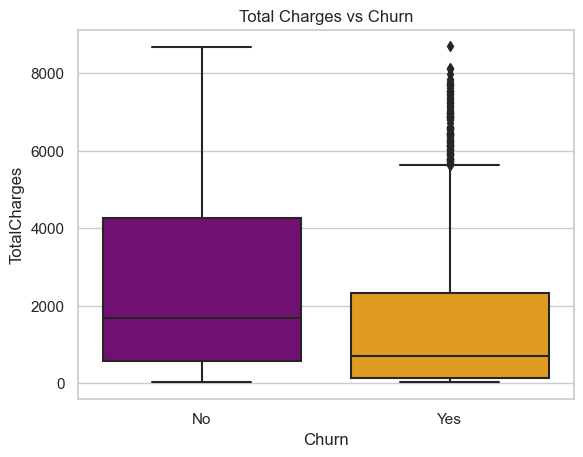

In [32]:
# Visualizing the relationship between 'Total Charges' and 'churn'
sns.boxplot(x='Churn', y='TotalCharges', data=customer_churn, palette=['purple', 'orange'])
plt.title('Total Charges vs Churn')
plt.show()

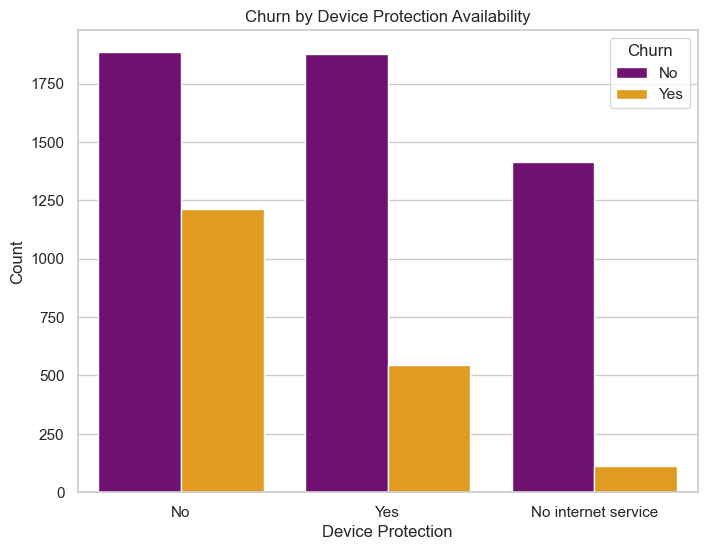

In [33]:

plt.figure(figsize=(8, 6))

# Countplot to visualize the relationship between 'TechnicalSupport' and 'Churn'
sns.countplot(x='DeviceProtection', hue='Churn', data=customer_churn, palette=['purple', 'orange'])

# Adding labels and title
plt.title('Churn by Device Protection Availability')
plt.xlabel('Device Protection')
plt.ylabel('Count')

# Show the plot
plt.show()

#### Observation

* The majority of churning recorded are higher among customers without device protection. 
* A slightly lower churning rate is observed among customers with device protection. 
* However, customers with no internet service experience the lowest churning rate in this category.

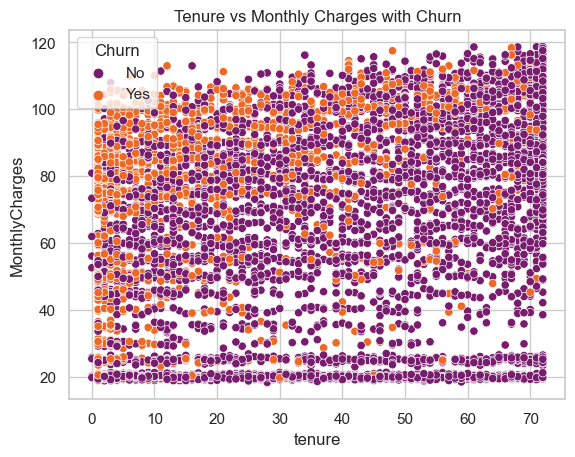

In [34]:
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=customer_churn, palette='inferno')

plt.title('Tenure vs Monthly Charges with Churn')
plt.show()

#### Naration

* It is evident that Monthly Charges can not be said to be the reason for churning overtime. 
* Though churning is slightly common among those customers that have being with company less
than 3 years. Further investigation still needed to understand the churning pattern much more.

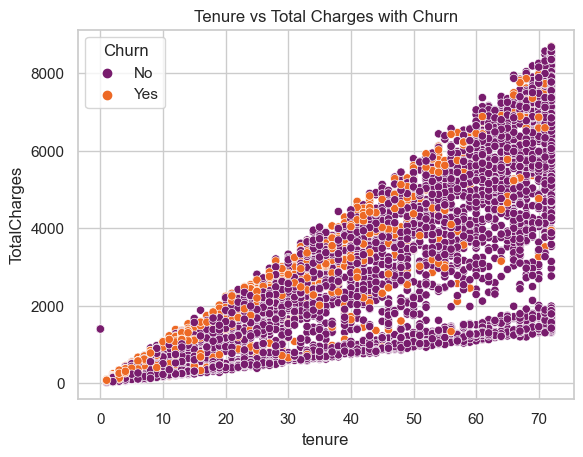

In [35]:
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=customer_churn, palette='inferno')

plt.title('Tenure vs Total Charges with Churn')
plt.show()

#### Observation

* The scatter plot above shows a pattern where customers tend to churn over time, aparently, due to the increasing total charges incurred for the subscribed services. 
* There are evident that the longer customers stay with the company, their total charges increase, leading to some customers churning. 
* However, the number of those who churned are relatively smaller compared to those who still remain with the company. 
* Further investigation is needed to gain deeper insights into how this specific group can be better catered for.

In [36]:
# this is used to covert categorical column to numerical for purpose of EDA

from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder() # method initiation


# Looping for columns
for cat_columns in customer_churn.columns[1:]:
    if(customer_churn[cat_columns].dtype == 'object'):
        customer_churn[cat_columns] = encoder.fit_transform(customer_churn[cat_columns])
    else:
        customer_churn[cat_columns] = customer_churn[cat_columns]



### Multivariate Analysis

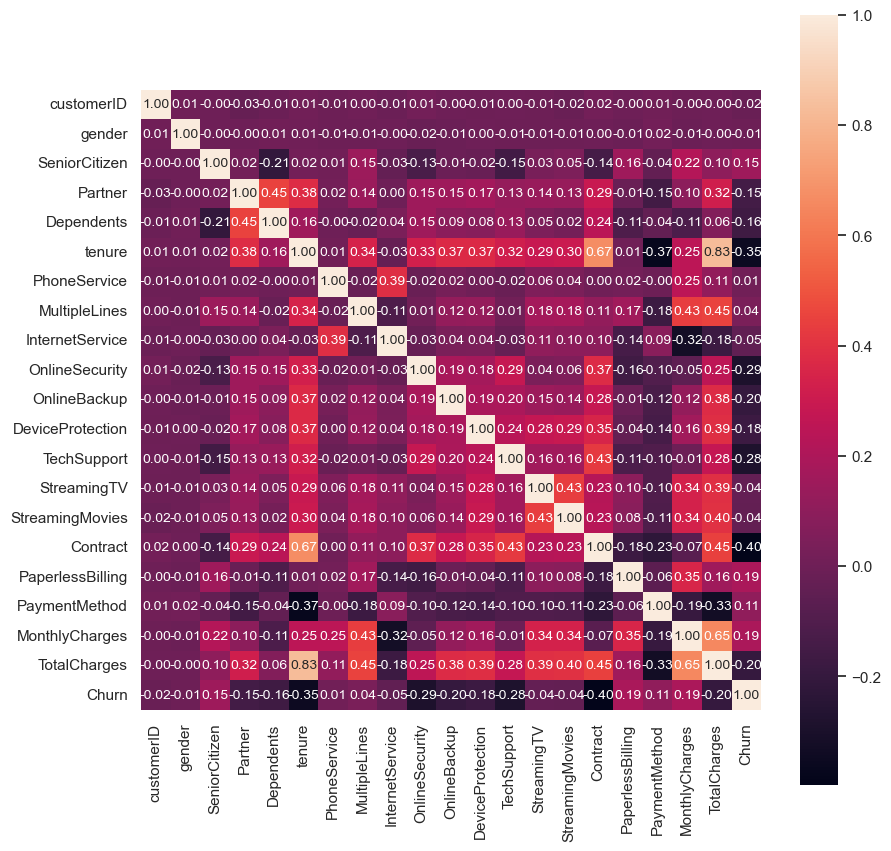

In [37]:
# Correlation between Churn and other variables in the dataset

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = customer_churn.select_dtypes(include=['object']).columns

for column in categorical_columns:
    customer_churn[column] = label_encoder.fit_transform(customer_churn[column])

# Plot the correlation heatmap
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(customer_churn.corr(), cbar=True, annot=True, square=True, fmt='.2f',
                      annot_kws={'size': 10})
plt.show()


In [38]:
# Dealing with Outliers- 'tenure', 'monthlycharges' and 'totalcharges'

# Normalising the data
scaler = MinMaxScaler()

customer_churn["Scaled_tnr"] = scaler.fit_transform(customer_churn['tenure'].values.reshape(-1, 1))
customer_churn["Scaled_MCharges"] = scaler.fit_transform(customer_churn[['MonthlyCharges']].values.reshape(-1, 1))
customer_churn["Scaled_TCharges"] = scaler.fit_transform(customer_churn[['TotalCharges']].values.reshape(-1, 1))


customer_churn.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Scaled_tnr,Scaled_MCharges,Scaled_TCharges
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,1,2,29.85,29.85,0,0.013889,0.115423,0.001275
1,3962,1,0,0,0,34,1,0,0,2,...,0,1,0,3,56.95,1889.50,0,0.472222,0.385075,0.215867
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,1,3,53.85,108.15,1,0.027778,0.354229,0.010310
3,5535,1,0,0,0,45,0,1,0,2,...,0,1,0,0,42.30,1840.75,0,0.625000,0.239303,0.210241
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,1,2,70.70,151.65,1,0.027778,0.521891,0.015330


### Machine Learning

In [39]:
# Split the dataset into training and testing test sets 

from sklearn.model_selection import train_test_split

# Assuming 'label' is the target variable, replace it with the actual column name if different
X_train, X_test, y_train, y_test = train_test_split(customer_churn.drop('Churn', axis=1), customer_churn['Churn'], test_size=0.2, random_state=42)


In [40]:
X_train.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Scaled_tnr,Scaled_MCharges,Scaled_TCharges
2142,2956,0,0,0,1,21,1,0,0,2,...,0,2,1,0,3,64.85,1336.80,0.291667,0.463682,0.152089
1623,4287,0,0,0,0,54,1,2,1,0,...,2,2,2,1,0,97.20,5129.45,0.750000,0.785572,0.589736
6074,2674,1,0,1,0,1,0,1,0,0,...,0,0,0,1,2,23.45,23.45,0.013889,0.051741,0.000537


In [41]:
y_train.head(3)

2142    0
1623    0
6074    1
Name: Churn, dtype: int32

In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = customer_churn.drop('Churn', axis=1)
y = customer_churn['Churn']

# Identify categorical columns 
categorical_columns = X.select_dtypes(include=['object']).columns

# Create a column transformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

# Apply the column transformer to X
X_encoded = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Model Building
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ly_pred = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))


Logistic Regression
Accuracy: 0.8126330731014905
Precision: 0.6676923076923077
Recall: 0.5817694369973191
F1-score: 0.6217765042979944
AUC-ROC: 0.7387611663751075


In [43]:
ly_pred

array([1, 0, 0, ..., 0, 0, 1])

In [44]:
y_test

185     1
2715    0
3825    0
1807    1
132     0
       ..
6366    0
315     0
2439    0
5002    0
1161    1
Name: Churn, Length: 1409, dtype: int32

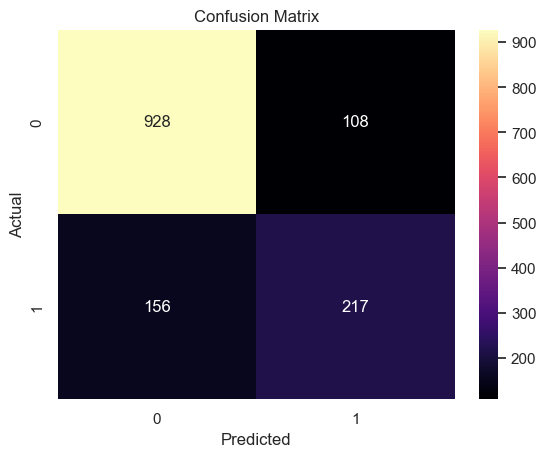

In [45]:
# Create a confusion matrix
lcm = confusion_matrix(y_test, ly_pred)

# Visualise the confusion matrix
sns.heatmap(lcm, annot = True, cmap = "magma", fmt = "g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [46]:
# Model Building 
# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))


Random Forest
Accuracy: 0.78708303761533
Precision: 0.631768953068592
Recall: 0.4691689008042895
F1-score: 0.5384615384615384
AUC-ROC: 0.6853566511743455


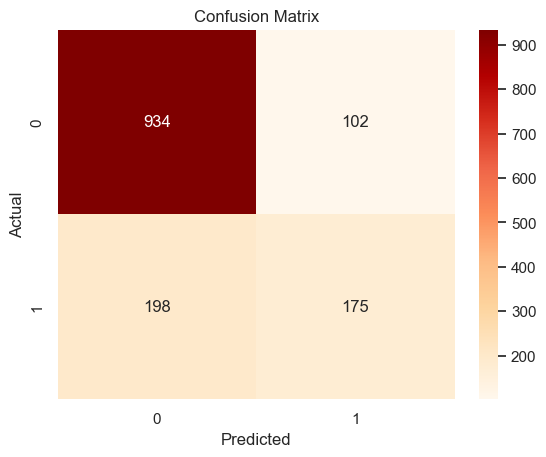

In [47]:
# Create a confusion matrix
lcm = confusion_matrix(y_test, rfy_pred)

# Visualise the confusion matrix
sns.heatmap(lcm, annot = True, cmap = "OrRd", fmt = "g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [48]:
from sklearn.tree import DecisionTreeClassifier

# Model Building
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)

print("Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Precision:", precision_score(y_test, dt_pred))
print("Recall:", recall_score(y_test, dt_pred))
print("F1-score:", f1_score(y_test, dt_pred))
print("AUC-ROC:", roc_auc_score(y_test, dt_pred))


Decision Tree Classifier
Accuracy: 0.7196593328601846
Precision: 0.4712041884816754
Recall: 0.48257372654155495
F1-score: 0.47682119205298007
AUC-ROC: 0.6437965157804301


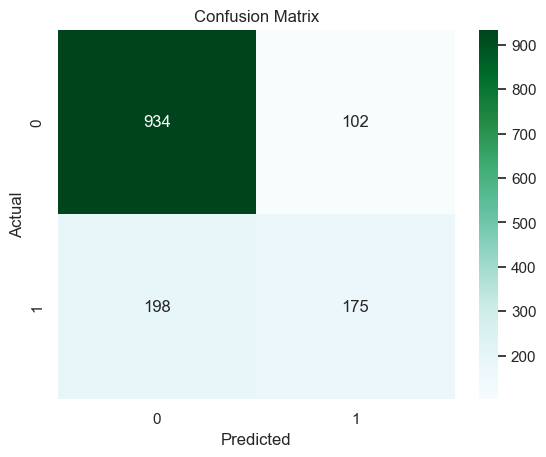

In [49]:
# Create a confusion matrix
lcm = confusion_matrix(y_test, rfy_pred)

# Visualise the confusion matrix
sns.heatmap(lcm, annot = True, cmap = "BuGn", fmt = "g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

classifiers = [
    [LogisticRegression(), 'Logistic Regression'],
    [RandomForestClassifier(), 'Random Forest'],
    [DecisionTreeClassifier(), 'Decision Tree']
]

In [51]:
classifiers

[[LogisticRegression(), 'Logistic Regression'],
 [RandomForestClassifier(), 'Random Forest'],
 [DecisionTreeClassifier(), 'Decision Tree']]

In [52]:
import numpy as np

acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = [str(round(a_score*100, 2)) + '%']
    precision_list[model_name] = [str(round(p_score*100, 2)) + '%']
    recall_list[model_name] = [str(round(r_score*100, 2)) + '%']
    roc_list[model_name] = [str(round(roc_score*100, 2)) + '%']
    
    if model_name != classifiers[-1][1]:
        print('')


In [53]:
acc_list

{'Logistic Regression': ['81.26%'],
 'Random Forest': ['79.63%'],
 'Decision Tree': ['72.6%']}

In [54]:
print("Accuracy Score")
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,Logistic Regression,Random Forest,Decision Tree
0,81.26%,79.63%,72.6%


In [55]:
print("Precision")
s2 = pd.DataFrame(precision_list)
s2.head()

Precision


,Logistic Regression,Random Forest,Decision Tree
0,66.77%,65.03%,48.34%


In [56]:
print("Recall")
s3 = pd.DataFrame(recall_list)
s3.head()

Recall


,Logistic Regression,Random Forest,Decision Tree
0,58.18%,49.87%,50.67%


In [57]:
print("ROC Score")
s4 = pd.DataFrame(roc_list)
s4.head()

ROC Score


,Logistic Regression,Random Forest,Decision Tree
0,73.88%,70.11%,65.59%


## Conclusion


* Based on the accuracy scores, the Logistic Regression model has the highest accuracy among the three models. 
* Therefore, Logistic Regression would be the preferred choice for predicting churn for Connecttel Limited.

* Here is the ranking based on accuracy:

1. Logistic Regression: 81.26%
2. Random Forest: 79.63%
3. Decision Tree: 72.06%

* The analysis of features indicates that numerical features play a significant role as primary influencers of the level of churn. 
* This implies that the inclusion of additional numerical features has the potential to enhance the predictive capabilities of the model. 
* The exploration and integration of relevant numerical features may result in a more resilient and accurate model.
* In fact, having examined the features within the Logistic Regression Model reveals pivotal elements influencing churn determination. Noteworthy contributors to churn include Total Charges, Month-to-month Contract, Fiber optic internet service, and the absence of online security to mention but few. Conversely, factors indicative of customers not churning encompass Tenure Years, Two years contract, DSL Internet service, and the absence of Multiple lines.

* Proper Model Monitoring should be a continuos exercise. In the process of model development, it is crucial to continuously monitor and refine the model. 
* Consistent updates with new data, exploration of feature engineering techniques, and experimentation with parameter tuning are 
essential practices that would enhance continuous improvement over time.

